IMPORT DATA AND REQUIRED PACKAGES
like pandas,numpy,matplotlib,seaborn, and warning library


#Basic imports

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings



IMPORT the CSV DATA as PANDAS DATAFRAME

In [6]:
df = pd.read_csv(r'C:\Users\tanuj\OneDrive\Desktop\MLproject\notebook\data\raw.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Preparing X and Y variables
X-dependent
Y-Independent

In [9]:
X = df.drop(columns=['math_score'],axis=1)

In [10]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())
print("Categories in 'race_ehnicity' variable:     ",end=" " )
print(df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable:     ",end=" " )
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())
print("Categories in 'test_preparation_course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())
      

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ehnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:      ['none' 'completed']


In [12]:
y = df['math_score']

In [13]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

CREATE COLUMN TRANSFORMER WITH 3 TYPES OF TRANSFORMERS

In [14]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer # used to apply both standard scaler and one hot encoder together

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [15]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(1000, 19)

SEPERATING DATA INTO TRAIN AND TEST

train test split basically

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Create an EVALUATE FUNCTION to give all metrics after model training

In [20]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,mse,rmse,r2_square

MOST IMPORTANT STEP


In [23]:
models = {
    "Linear Regression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "SVR":SVR(),
    "XGB Regressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluating Train and test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance on Training set")
    print("- Root mean squared error: {:.4f}".format(model_train_rmse))
    print("- Mean absolute error: {:.4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))

    print("--------------------------------")

    print("Model performance on Test set")
    print("- Root mean squared error: {:.4f}".format(model_test_rmse))
    print("- Mean absolute error: {:.4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance on Training set
- Root mean squared error: 5.3231
- Mean absolute error: 4.2667
- R2 score: 0.8743
--------------------------------
Model performance on Test set
- Root mean squared error: 5.3940
- Mean absolute error: 4.2148
- R2 score: 0.8804


Ridge
Model performance on Training set
- Root mean squared error: 5.3233
- Mean absolute error: 4.2650
- R2 score: 0.8743
--------------------------------
Model performance on Test set
- Root mean squared error: 5.3904
- Mean absolute error: 4.2111
- R2 score: 0.8806


Lasso
Model performance on Training set
- Root mean squared error: 6.5938
- Mean absolute error: 5.2063
- R2 score: 0.8071
--------------------------------
Model performance on Test set
- Root mean squared error: 6.5197
- Mean absolute error: 5.1579
- R2 score: 0.8253


KNeighbors Regressor
Model performance on Training set
- Root mean squared error: 5.7079
- Mean absolute error: 4.5168
- R2 score: 0.8555
--------------------------------
Mode

RESULTS

In [25]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.880433
9,AdaBoost Regressor,0.853679
8,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.849937
7,XGB Regressor,0.827797
2,Lasso,0.825320
3,KNeighbors Regressor,0.783813
4,Decision Tree,0.735471
6,SVR,0.728600


LINEAR REGRESSION

In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accurace of the model is %.2f" %score)

Accurace of the model is 88.04


PLOT y_pred and y_test

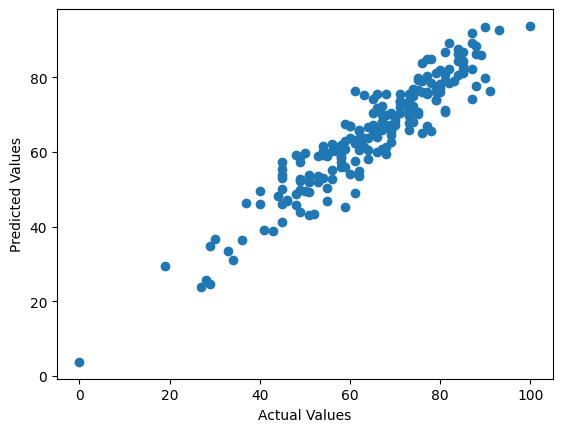

In [27]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual Values');
plt.ylabel('Predicted Values');

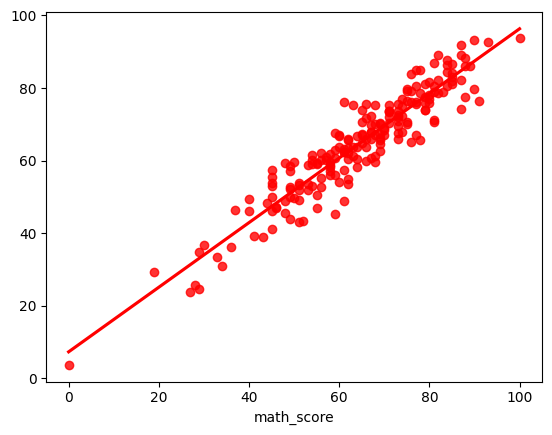

In [28]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

Difference b/w Actual and Predicted values

In [29]:
pred_df = pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred,'Difference':y_test - y_pred})


In [30]:
pred_df

,Actual Values,Predicted Values,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
